# Introduction: Machine Learning Part 1


__Use the provided building energy data to develop a model that can predict a building's Energy Star score, and then interpret the results to find the variables that are most predictive of the score.__

This is a supervised, regression machine learning task: given a set of data with targets (in this case the score) included, we want to train a model that can learn to map the features (also known as the explanatory variables) to the target. 


## Machine Learning Workflow

Although the exact implementation details can vary, the general structure of a machine learning project stays relatively constant: 

1. Data cleaning and formatting
2. Exploratory data analysis
3. Feature engineering and selection
4. Establish a baseline and compare several machine learning models on a performance metric

    __to be continued ...__

Setting up the structure of the pipeline ahead of time lets us see how one step flows into the other. However, the machine learning pipeline is an iterative procedure and so we don't always follow these steps in a linear fashion.  We may revisit a previous step based on results from further down the pipeline. For example, while we may perform feature selection before building any models, we may use the modeling results to go back and select a different set of features. Or, the modeling may turn up unexpected results that mean we want to explore our data from another angle. Generally, you have to complete one step before moving on to the next, but don't feel like once you have finished one step the first time, you cannot go back and make improvements! 



# Format

__Code__

fill where ever there is a missing spot like ... or your code and also be carful about null values!

__Questions__

Write your answer with enough explanation   

In [1]:
# Import necessary library
import pandas as pd

# Load the dataset
energy_and_water_data = pd.read_csv('Energy_and_Water.csv')

# Calculate the percentage of missing values for each column
missing_df = energy_and_water_data.isnull().mean() * 100

# Define a threshold for excessive missing values (50%)
threshold = 50
missing_columns = missing_df[missing_df > threshold].index

# Output the number of columns to be removed
print(f"We will remove {len(missing_columns)} columns.")


We will remove 0 columns.


## Imports
 
We will use the standard data science and machine learning libraries: `numpy`, `pandas`, and `scikit-learn`. We also use `matplotlib` and `seaborn` for visualization. 

In [2]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 24
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

# Data Cleaning and Formatting

## Load in the Data and Examine

We will be loading our data into a pandas dataframe, one of the most useful data structures for data science. Think of it as a spreadsheet within Python that we can easily manipulate, clean, and visualize. [Pandas has many methods](http://pandas.pydata.org/pandas-docs/stable/) to help make the data science/machine learning pipeline as smooth as possible.

In [4]:
# Read in data into a dataframe 
data = pd.read_csv('Energy_and_Water.csv')

# Display top of dataframe
data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hos

Taking a look at the raw data, we can already see a number of issues we'll have to solve. First of all, there are 60 columns and we don't know what many of them mean! All we know from the problem statement is that we want to predict the number in the `score` column. Some of the other column definitions can be reasonably guessed, but others are difficult to understand .In machine learning, this isn't actually a problem, because we let the model decide which features are important. Sometimes we may not even be given column names or told what we are predicting. Nonetheless,  to understand the problem to the extent possible, and because we also want to interpret the model results, it would be a good idea to have some knowledge of the columns. 

 we can get to [this pdf document](http://www.nyc.gov/html/gbee/downloads/misc/nyc_benchmarking_disclosure_data_definitions_2017.pdf) that details the meaning of every column. 

While we don't need to study every column, it would be a good idea to at least understand the target we want to predict. Here is the definition for the `score` target:

    A 1-to-100 percentile ranking for specified building types, calculated in Portfolio Manager, based on self-reported energy usage for the reporting year.
    
That seems pretty straightforward: the Energy Star Score is a method of ranking buildings in terms of energy efficiency with 1 the worst and 100 the best. It is a relative percentile ranking which means buildings are scored relative to one another and should display a uniform distribution across the range of values.

## Data Types and Missing Values

The `dataframe.info` method is a quick way to assess the data by displaying the data types of each column and the number of non-missing values. Already from looking at the dataframe, there might be a problem because the missing values are coded as "Not Available" rather than as `np.nan` (not a number). This means the columns with numbers will not be represented as numeric because pandas converts columns with any strings values into columns of all strings.

In [5]:
# See the column data types and non-missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

Sure enough, there are a number of columns with numbers that have been recorded as `object` datatypes. These will have to be converted to `float` datatype before we can do any numerical analysis. 

### Convert Data to Correct Types

We convert the columns with numbers into numeric data types by replacing the "Not Available" entries with `np.nan` which can be interpreted as floats. Then we will convert the columns that contain numeric values (such as square feet or energy usage) into numeric datatypes. 

In [37]:
import numpy as np

# Replace all occurrences of 'Not Available' with numpy NaN
data = energy_and_water_data.replace("Not Available", np.nan)

# Identify truly numeric columns stored as strings
potential_numeric_columns = ['Site EUI (kBtu/ft²)', 'Largest Property Use Type - Gross Floor Area (ft²)', 
                             'ENERGY STAR Score']  # Add other columns as needed

# Convert these columns to numeric
for col in potential_numeric_columns:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')


In [38]:
# Statistics for each column
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11735 non-null  object 
 7   NYC Building Identification Number (BIN)                    11584 non-null  object 
 

## Missing Values

Now that we have the correct column datatypes, we can start analysis by looking at the percentage of missing values in each column. Missing values are fine when we do Exploratory Data Analysis, but they will have to be filled in for machine learning methods.

In [39]:
# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'}
    )
    
    # Filter out columns with no missing values
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0
    ].sort_values('% of Total Values', ascending=False).round(1)
    
    # Print summary
    print(f"Your selected dataframe has {df.shape[1]} columns.")
    print(f"There are {mis_val_table_ren_columns.shape[0]} columns with missing values.")
    
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

# Apply the function to the data
missing_values = missing_values_table(data)
missing_values


Your selected dataframe has 60 columns.
There are 46 columns with missing values.


,Missing Values,% of Total Values
Fuel Oil #1 Use (kBtu),11737,99.9
Diesel #2 Use (kBtu),11730,99.9
Address 2,11539,98.2
Fuel Oil #5 & 6 Use (kBtu),11152,94.9
District Steam Use (kBtu),10810,92.0
Fuel Oil #4 Use (kBtu),10425,88.8
3rd Largest Property Use Type - Gross Floor Area (ft²),10262,87.4
3rd Largest Property Use Type,10262,87.4
Fuel Oil #2 Use (kBtu),9165,78.0
2nd Largest Property Use Type,8005,68.2


What seems to be the problem?\
asw:\
What can we do?\
asw:\
Do a bit of a research and decide on a threshold, and explain why is it suited.\
asw:
 

In [40]:
# Apply threshold to remove columns
threshold = 50  # Percentage threshold
missing_columns = missing_values[missing_values['% of Total Values'] > threshold].index

# Drop these columns
data_cleaned = data.drop(columns=missing_columns)

# Summary
print(f"We will remove {len(missing_columns)} columns.")
data_cleaned.info()


We will remove 11 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 49 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11735 non-null  object 
 7   NYC Building Identification Number (BIN)                  

In [41]:
# Drop the columns
data = data.drop(columns = list(missing_columns))

The rest of the missing values will have to be imputed (filled-in) using an appropriate strategy before doing machine learning. 

# Exploratory Data Analysis

[Exploratory Data Analysis (EDA) is an open-ended process where we make plots and calculate statistics in order to explore our data. The purpose is to to find anomalies, patterns, trends, or relationships. These may be interesting by themselves (for example finding a correlation between two variables) or they can be used to inform modeling decisions such as which features to use. In short, the goal of EDA is to determine what our data can tell us! EDA generally starts out with a high-level overview, and then narrows in to specific parts of the dataset once as we find interesting areas to examine. 

To begin the EDA, we will focus on a single variable, the Energy Star Score, because this is the target for our machine learning models. We can rename the column to `score` for simplicity and then start exploring this value.

## Single Variable Plots

A single variable (called [univariate](https://en.wikipedia.org/wiki/Univariate_(statistics)) plot shows the distribution of a single variable such as in a histogram.

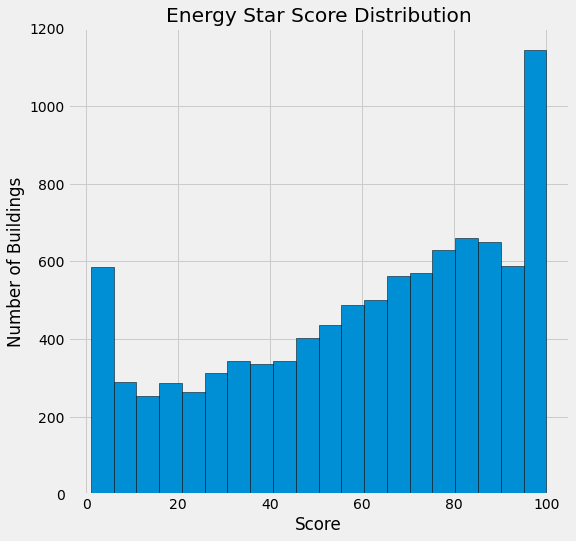

In [42]:
import matplotlib.pyplot as plt

# Ensure column renaming for simplicity
data = data.rename(columns={'ENERGY STAR Score': 'score'})

# Set plot size
plt.figure(figsize=(8, 8))

# Plot a histogram for 'score' with appropriate bins
plt.style.use('fivethirtyeight')
plt.hist(data['score'].dropna(), bins=20, edgecolor='black')  # Use 20 bins for better granularity

# Add labels and title
plt.xlabel('Score')
plt.ylabel('Number of Buildings')
plt.title('Energy Star Score Distribution')

# Show the plot
plt.show()


Our first plot has already revealed some surprising (and suspicious) information! 
What interesting pint do we understand from this plot? (HINT: refer to score definition and pdf)
asw:

To contrast the Energy Star Score, we can look at the Energy Use Intensity (EUI), which is the total energy use divided by the square footage of the building. Here the energy usage is not self-reported, so this could be a more objective measure of the energy efficiency of a building. Moreover, this is not a percentile rank, so the absolute values are important and we would expect them to be approximately normally distributed with perhaps a few outliers on the low or high end. 

Text(0.5, 1.0, 'Site EUI Distribution')

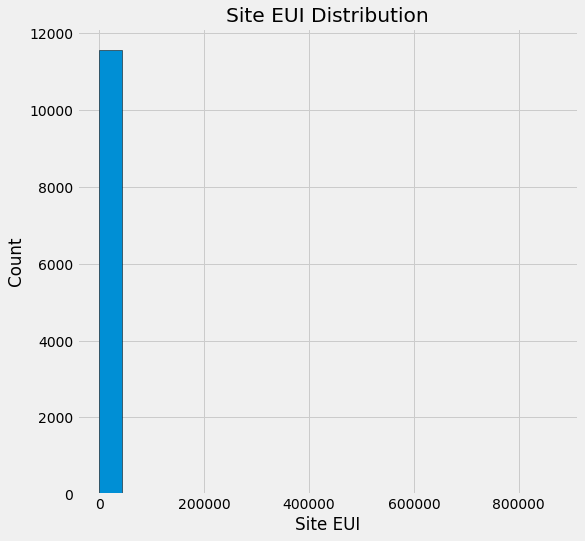

In [43]:
# Histogram Plot of Site EUI
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black')
plt.xlabel('Site EUI')
plt.ylabel('Count')
plt.title('Site EUI Distribution')

Well it seems we have another problem: outliers!
The graph is incredibly skewed because of the presence of a few buildings with very high scores. It looks like we will have to take a slight detour to deal with the outliers. Let's look at the stats for this feature.

In [44]:
data['Site EUI (kBtu/ft²)'].describe()

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

How can we understand the existence of outlier from this information?\
asw:

__Find the one building (outlier) which is very different from the others__

In [45]:
# Find the building with the maximum 'Site EUI (kBtu/ft²)'
outlier_building = data[data['Site EUI (kBtu/ft²)'] == data['Site EUI (kBtu/ft²)'].max()]

outlier_building


,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
8068,9984,4414323,234 Skillman,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3028937502,3028937502,"3390250 , 3338313",234 Skillman avenue,11211,234,SKILLMAN AVENUE,Brooklyn,61811.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,56900.0,2004,1,90,Whole Building,NaN,1.0,869265.0,939329,9.9,9393,986366,49459193300,5.344589688E8,1983655.6,563239.6,2627199.1,2627015,184.1,56900,2547.9,44.78,912801.1,05/01/2017 11:34:14 PM,NaN,In Compliance,40.716233,-73.94141,1.0,34.0,477.0,East Williamsburg ...



### Removing Outliers

When we remove outliers, we want to be careful that we are not throwing away measurements just because they look strange. They may be the result of actual phenomenon that we should further investigate. When removing outliers, I try to be as conservative as possible, using the definition of an [extreme outlier](https://people.richland.edu/james/lecture/m170/ch03-pos.html): 

* On the low end, an extreme outlier is below  $\text{First Quartile} -3 * \text{Interquartile Range}$
* On the high end, an extreme outlier is above $\text{Third Quartile} + 3 * \text{Interquartile Range}$

In this case, I will only remove the single outlying point and see how the distribution looks.

In [46]:
# Calculate first and third quartile for 'Site EUI (kBtu/ft²)'
first_quartile = data['Site EUI (kBtu/ft²)'].quantile(0.25)
third_quartile = data['Site EUI (kBtu/ft²)'].quantile(0.75)

# Interquartile range
iqr = third_quartile - first_quartile

# Remove extreme outliers
data = data[(data['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) &
            (data['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))]

# Verify the changes
data['Site EUI (kBtu/ft²)'].describe()


count    11319.000000
mean        79.086377
std         33.317277
min          0.000000
25%         61.200000
50%         77.800000
75%         95.800000
max        204.800000
Name: Site EUI (kBtu/ft²), dtype: float64

Text(0.5, 1.0, 'Site EUI Distribution')

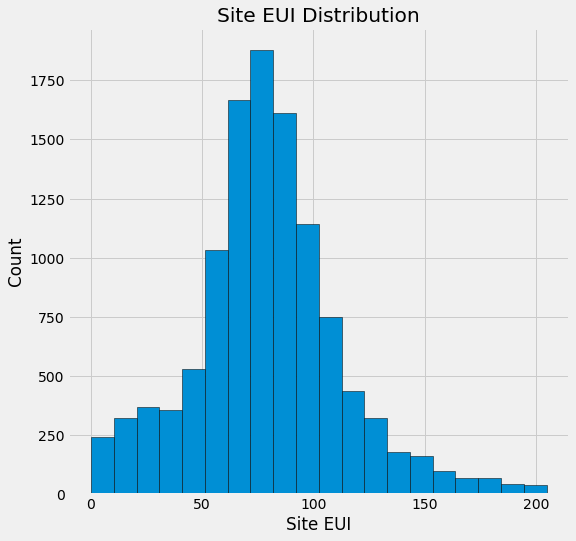

In [47]:
# Histogram Plot of Site EUI
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black')
plt.xlabel('Site EUI')
plt.ylabel('Count')
plt.title('Site EUI Distribution')

After removing the outliers, we can get back to the analysis.

This plot looks a little less suspicious and is close to normally distributed with a long tail on the right side (it has a positive skew). 

Although this might be a more objective measure, our goal is still to predict the Energy Star Score, so we will move back to examining that variable. 

## Looking for Relationships

In order to look at the effect of categorical variables on the score, we can make a [density plot](https://datavizcatalogue.com/methods/density_plot.html) colored by the value of the categorical variable. Density plots also show the distribution of a single variable and can be thought of as a smoothed histogram. 
If we color the density curves by a categorical variable, this will shows us how the distribution changes based on the class. 

The first plot we will make shows the distribution of scores by the property type. In order to not clutter the plot, we will limit the graph to building types that have more than 100 observations in the dataset. 

In [54]:
types = data.dropna(subset=['score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)
print(types)

['Multifamily Housing', 'Office', 'Hotel', 'Non-Refrigerated Warehouse']


C:\Users\ARVAND\AppData\Local\Temp/ipykernel_11468/4258822498.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['score'].dropna(),
C:\Users\ARVAND\AppData\Local\Temp/ipykernel_11468/4258822498.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['score'].dropna(),
C:\Users\ARVAND\AppData\Local\Temp/ipykernel_11468/4258822498.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['score'].dropna(),
C:\Users\ARVAND\AppData\Local\Temp/ipykernel_11468/4258822498.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; pl

Text(0.5, 1.0, 'Density Plot of Energy Star Scores by Building Type')

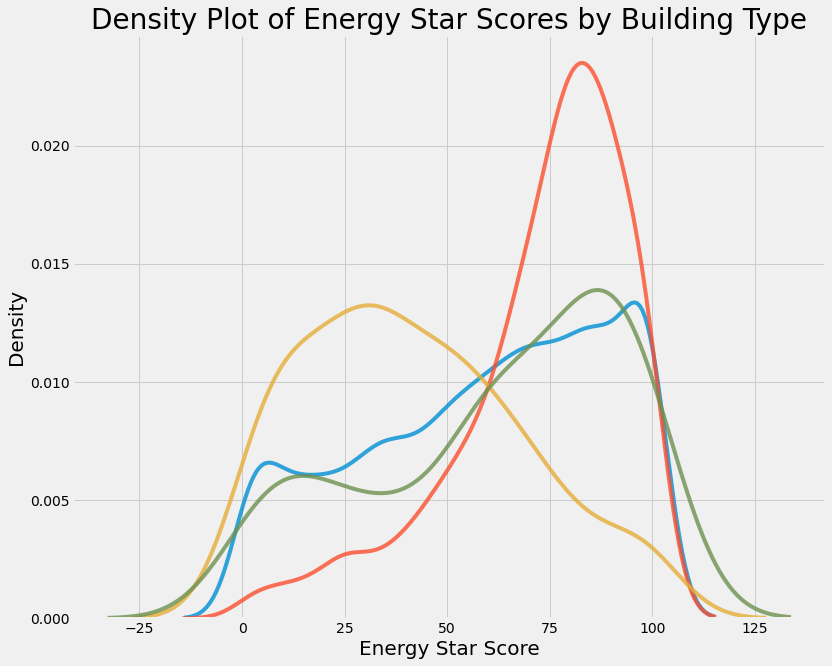

In [55]:
# Plot of distribution of scores for building categories
figsize(12, 10)

# Plot each building
for b_type in types:
    # Select the building type
    subset = data[data['Largest Property Use Type'] == b_type]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = b_type, shade = False, alpha = 0.8)
    
# label the plot
plt.xlabel('Energy Star Score', size = 20)
plt.ylabel('Density', size = 20)
plt.title('Density Plot of Energy Star Scores by Building Type', size = 28)

It can be seen that the `Largest Property Use Type` or the building type affects our wanted `score` (the negative scores on the graph are an artifact of the [kernel density estimation](https://chemicalstatistician.wordpress.com/2013/06/09/exploratory-data-analysis-kernel-density-estimation-in-r-on-ozone-pollution-data-in-new-york-and-ozonopolis/) procedure). \


How can we convert this categorical variable to a useful form of data for our Model?\
asw:

To examine another categorical variable, borough, we can make the same graph, but this time colored by the borough.

In [70]:
boroughs = data['NYC Borough, Block and Lot (BBL) self-reported'].value_counts()


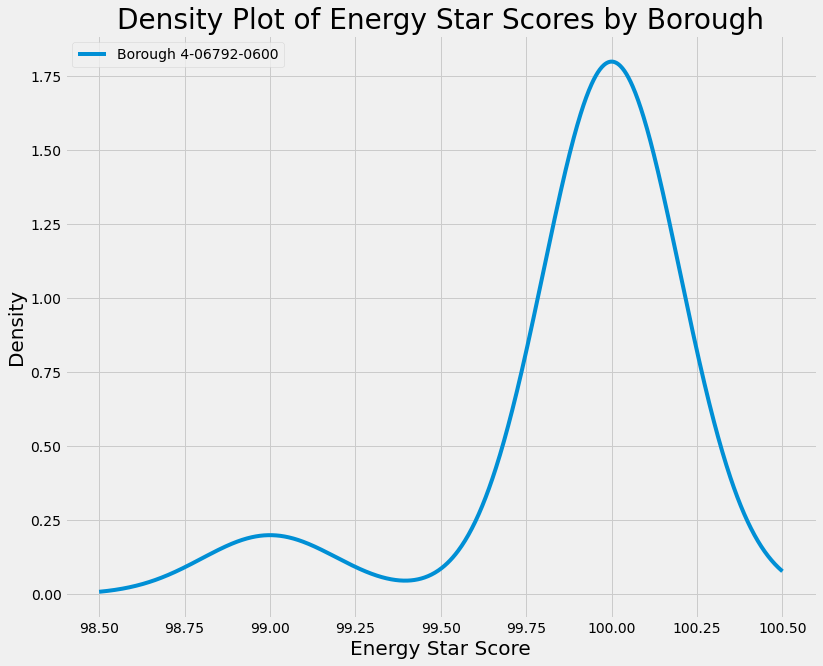

In [71]:
# Create a list of boroughs with more than 100 observations
boroughs = list(boroughs[boroughs > 10].index)

# Plot the distribution of scores for each borough
plt.figure(figsize=(12, 10))

# Plot each borough's distribution
for borough in boroughs:
    subset = data[data['NYC Borough, Block and Lot (BBL) self-reported'] == borough]
    subset['score'].plot(kind='kde', label=f'Borough {borough}')

# Label the plot
plt.xlabel('Energy Star Score', size=20)
plt.ylabel('Density', size=20)
plt.title('Density Plot of Energy Star Scores by Borough', size=28)
plt.legend()
plt.show()


How is boroughs different from building type?\
asw:\
Is it useful to use this column as well?\
asw:

## Correlations between Features and Target

In order to quantify correlations between the features (variables) and the target, use the Pearson similarity

In [74]:
import pandas as pd
import numpy as np

# Reload the dataset (replace with your file path)
ddata = pd.read_csv('Energy_and_Water.csv')

# Replace "Not Available" with NaN
ddata = ddata.replace("Not Available", np.nan)

# Convert numeric columns to numeric types
numeric_columns = ['Site EUI (kBtu/ft²)', 'Largest Property Use Type - Gross Floor Area (ft²)', 
                   'ENERGY STAR Score']

for col in numeric_columns:
    if col in data.columns:
        ddata[col] = pd.to_numeric(ddata[col], errors='coerce')

# Rename 'ENERGY STAR Score' to 'score' for simplicity
ddata = ddata.rename(columns={'ENERGY STAR Score': 'score'})

# Select only numeric columns for correlation
numeric_data = ddata.select_dtypes(include=['float64', 'int64'])

# Find all correlations with the target variable 'score' and sort them
correlations_data = numeric_data.corr()['score'].sort_values()

# Print the most negative and positive correlations
print("Most Negative Correlations:")
print(correlations_data.head(15), '\n')

print("Most Positive Correlations:")
print(correlations_data.tail(15))


Most Negative Correlations:
Year Built                                           -0.118181
Property Id                                          -0.047020
Latitude                                             -0.044262
Site EUI (kBtu/ft²)                                  -0.036123
Occupancy                                            -0.031116
Longitude                                            -0.029670
Number of Buildings - Self-reported                  -0.020564
Census Tract                                         -0.001607
DOF Gross Floor Area                                  0.006877
Property GFA - Self-Reported (ft²)                    0.016800
Largest Property Use Type - Gross Floor Area (ft²)    0.017734
Order                                                 0.039524
Council District                                      0.063185
Community Board                                       0.064054
score                                                 1.000000
Name: score, dtype: float64

There are several strong negative correlations between the features and the target. The most negative correlations with the score are the different categories of Energy Use Intensity (EUI), `Site EUI (kBtu/ft²)` and  `Weather Normalized Site EUI (kBtu/ft²)` (these vary slightly in how they are calculated). The EUI is the amount of energy used by a building divided by the square footage of the buildings and is meant to be a measure of the efficiency of a building with a lower score being better. Intuitively, these correlations then make sense: as the EUI increases, the Energy Star Score tends to decrease. 

To account for possible non-linear relationships, You can take square root and natural log transformations of the features and then calculate the correlation coefficients with the score. 

In the following code, we take log and square root transformations of the numerical variables, the correlations between all of the features and the score, and display the top 15 most positive and top 15 most negative correlations.

Remember to transform useful Categorical Columns to numerical form!

In [1]:
import pandas as pd
import numpy as np

# Load only the first 4000 rows of the dataset
jdata = pd.read_csv('Energy_and_Water.csv', nrows=4000)  # Adjust the file path if necessary

# Replace "Not Available" with NaN
jdata = jdata.replace("Not Available", np.nan)

# Convert numeric columns to numeric types
numeric_columns = ['Site EUI (kBtu/ft²)', 'Largest Property Use Type - Gross Floor Area (ft²)', 
                   'ENERGY STAR Score', 'Weather Normalized Site EUI (kBtu/ft²)']
for col in numeric_columns:
    if col in jdata.columns:
        jdata[col] = pd.to_numeric(jdata[col], errors='coerce')

# Rename 'ENERGY STAR Score' to 'score'
jdata = jdata.rename(columns={'ENERGY STAR Score': 'score'})

# Preprocess categorical data using label encoding for simplicity
categorical_columns = ['NYC Borough, Block and Lot (BBL) self-reported']  # Adjust based on available columns
for col in categorical_columns:
    if col in jdata.columns:
        jdata[col] = jdata[col].astype('category').cat.codes

# Select numeric columns
numeric_subset = jdata.select_dtypes(include=['number'])

# Apply transformations to key numeric columns only
selected_columns = ['Site EUI (kBtu/ft²)', 'score']  # Modify based on relevance
for col in selected_columns:
    if col != 'score':  # Skip the target column
        if col in numeric_subset.columns:
            numeric_subset[f'sqrt_{col}'] = np.sqrt(numeric_subset[col])
            numeric_subset[f'log_{col}'] = np.log1p(numeric_subset[col])  # log(1 + x) to avoid log(0) issues

# Merge numeric and categorical subsets
features = pd.concat([numeric_subset, jdata[categorical_columns]], axis=1)

# Drop rows without a score
features = features.dropna(subset=['score'])

# Find and display correlations
correlations = features.corr()['score'].dropna().sort_values()

# Display the most negative and most positive correlations
print("Most Negative Correlations:")
print(correlations.head(15), '\n')
print("Most Positive Correlations:")
print(correlations.tail(15))


Most Negative Correlations:
log_Site EUI (kBtu/ft²)                              -0.560726
sqrt_Site EUI (kBtu/ft²)                             -0.237701
Year Built                                           -0.207374
Site EUI (kBtu/ft²)                                  -0.107546
Weather Normalized Site EUI (kBtu/ft²)               -0.104735
Property Id                                          -0.070683
Occupancy                                            -0.049161
Census Tract                                         -0.023574
Order                                                -0.020038
Number of Buildings - Self-reported                  -0.004117
Longitude                                             0.010216
Property GFA - Self-Reported (ft²)                    0.043976
Largest Property Use Type - Gross Floor Area (ft²)    0.045146
DOF Gross Floor Area                                  0.049127
Latitude                                              0.055676
Name: score, dtype: float64

In [2]:
# Display most negative correlations
correlations.head(15)

log_Site EUI (kBtu/ft²)                              -0.560726
sqrt_Site EUI (kBtu/ft²)                             -0.237701
Year Built                                           -0.207374
Site EUI (kBtu/ft²)                                  -0.107546
Weather Normalized Site EUI (kBtu/ft²)               -0.104735
Property Id                                          -0.070683
Occupancy                                            -0.049161
Census Tract                                         -0.023574
Order                                                -0.020038
Number of Buildings - Self-reported                  -0.004117
Longitude                                             0.010216
Property GFA - Self-Reported (ft²)                    0.043976
Largest Property Use Type - Gross Floor Area (ft²)    0.045146
DOF Gross Floor Area                                  0.049127
Latitude                                              0.055676
Name: score, dtype: float64

In [3]:
# Display most positive correlations
correlations.tail(15)

Property Id                                          -0.070683
Occupancy                                            -0.049161
Census Tract                                         -0.023574
Order                                                -0.020038
Number of Buildings - Self-reported                  -0.004117
Longitude                                             0.010216
Property GFA - Self-Reported (ft²)                    0.043976
Largest Property Use Type - Gross Floor Area (ft²)    0.045146
DOF Gross Floor Area                                  0.049127
Latitude                                              0.055676
Community Board                                       0.068253
Council District                                      0.070989
NYC Borough, Block and Lot (BBL) self-reported        0.096617
NYC Borough, Block and Lot (BBL) self-reported        0.096617
score                                                 1.000000
Name: score, dtype: float64

After transforming the features, the strongest relationships are still those related to Energy Use Intensity (EUI). The log and square root transformations do not seem the have resulted in any stronger relationships. There are no strong positive linear relationships although we do see that a building type of office (`Largest Property Use Type_Office`) is slightly positively correlated with the score. This variable is a one-hot encoded representation of the categorical variables for building type.

We can use these correlations in order to perform feature selection (coming up in a little bit). Right now, let's graph the most significant correlation (in terms of absolute value) in the dataset which is `Site EUI (kBtu/ft^2)`. We can color the graph by the building type to show how that affects the relationship. 

## Two-Variable Plots

In order to visualize the relationship between two variables, we use a scatterplot. We can also include additional variables using aspects such as color of the markers or size of the markers. Here we will plot two numeric variables against one another and use color to represent a third categorical variable.

C:\Users\ARVAND\AppData\Local\Temp/ipykernel_6496/952166838.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Largest Property Use Type'] = pd.cut(


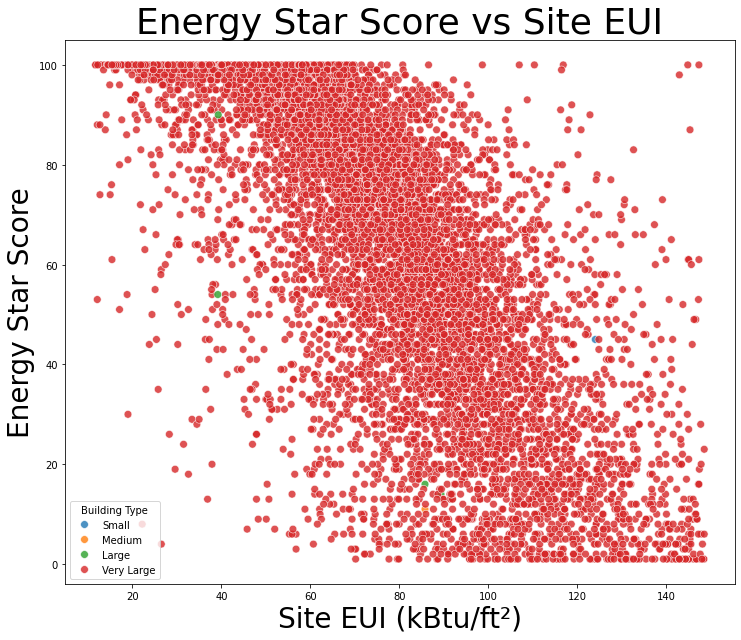

Correlation coefficient between Site EUI and Score: -0.70


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reload dataset
data = pd.read_csv('Energy_and_Water.csv')
data = data.replace("Not Available", np.nan)

# Convert numeric columns
numeric_columns = ['Site EUI (kBtu/ft²)', 'Largest Property Use Type - Gross Floor Area (ft²)', 
                   'ENERGY STAR Score']
for col in numeric_columns:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Rename 'ENERGY STAR Score' to 'score'
data = data.rename(columns={'ENERGY STAR Score': 'score'})

# Filter necessary data
features = data.dropna(subset=['score', 'Site EUI (kBtu/ft²)'])

# Add dummy categorical column for 'Largest Property Use Type'
features['Largest Property Use Type'] = pd.cut(
    features['Largest Property Use Type - Gross Floor Area (ft²)'], 
    bins=[0, 5000, 10000, 20000, np.inf], 
    labels=['Small', 'Medium', 'Large', 'Very Large']
)

# Remove outliers using IQR method for 'Site EUI (kBtu/ft²)'
q1 = features['Site EUI (kBtu/ft²)'].quantile(0.25)
q3 = features['Site EUI (kBtu/ft²)'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
features = features[(features['Site EUI (kBtu/ft²)'] >= lower_bound) & 
                    (features['Site EUI (kBtu/ft²)'] <= upper_bound)]

# Check if filtered dataset is not empty
if not features.empty:
    # Scatterplot with seaborn
    plt.figure(figsize=(12, 10))
    sns.scatterplot(
        x=features['Site EUI (kBtu/ft²)'],
        y=features['score'],
        hue=features['Largest Property Use Type'],
        alpha=0.8,
        s=60
    )
    plt.xlabel("Site EUI (kBtu/ft²)", fontsize=28)
    plt.ylabel("Energy Star Score", fontsize=28)
    plt.title("Energy Star Score vs Site EUI", fontsize=36)
    plt.legend(title="Building Type")
    plt.show()

    # Display correlation for verification
    correlation = features['Site EUI (kBtu/ft²)'].corr(features['score'])
    print(f"Correlation coefficient between Site EUI and Score: {correlation:.2f}")
else:
    print("Filtered dataset is empty. Adjust the filters or check the data.")


There is a clear negative relationship between the Site EUI and the score. The relationship is not perfectly linear (it looks with a correlation coefficient of -0.7, but it does look like this feature will be important for predicting the score of a building. 

### Pairs Plot

As a final exercise for exploratory data analysis, we can make a pairs plot between several different variables. The Pairs Plot is a great way to examine many variables at once as it shows scatterplots between pairs of variables and histograms of single variables on the diagonal. 

Using the seaborn `PairGrid` function, we can map different plots on to the three aspects of the grid. The upper triangle will have scatterplots, the diagonal will show histograms, and the lower triangle will show both the correlation coefficient between two variables and a 2-D kernel density estimate of the two variables. 

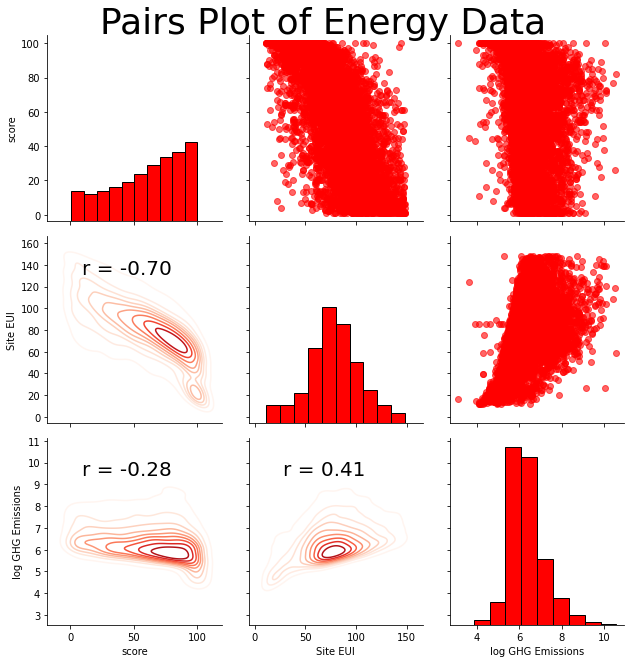

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Verify and convert the column to numeric for log transformation
if 'Total GHG Emissions (Metric Tons CO2e)' in features.columns:
    features['Total GHG Emissions (Metric Tons CO2e)'] = pd.to_numeric(
        features['Total GHG Emissions (Metric Tons CO2e)'], errors='coerce'
    )
    features['log_Total GHG Emissions (Metric Tons CO2e)'] = np.log1p(features['Total GHG Emissions (Metric Tons CO2e)'])

# Extract relevant columns (exclude missing columns)
available_columns = ['score', 'Site EUI (kBtu/ft²)', 
                     'Weather Normalized Source EUI (kBtu/ft²)', 
                     'log_Total GHG Emissions (Metric Tons CO2e)']
plot_data = features[[col for col in available_columns if col in features.columns]]

# Replace infinite values with NaN
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

# Rename columns for better readability in the plot
rename_dict = {
    'Site EUI (kBtu/ft²)': 'Site EUI', 
    'Weather Normalized Source EUI (kBtu/ft²)': 'Weather Norm EUI',
    'log_Total GHG Emissions (Metric Tons CO2e)': 'log GHG Emissions'
}
plot_data = plot_data.rename(columns={k: v for k, v in rename_dict.items() if k in plot_data.columns})

# Drop rows with NaN values
plot_data = plot_data.dropna()

# Function to calculate correlation coefficient and annotate the plot
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size=20)

# Create the PairGrid object
grid = sns.PairGrid(data=plot_data, height=3)

# Map scatterplot to the upper triangle
grid.map_upper(plt.scatter, color='red', alpha=0.6)

# Map histogram to the diagonal
grid.map_diag(plt.hist, color='red', edgecolor='black')

# Map correlation and KDE plot to the lower triangle
grid.map_lower(corr_func)
grid.map_lower(sns.kdeplot, cmap="Reds")

# Add a title to the entire plot
plt.suptitle('Pairs Plot of Energy Data', size=36, y=1.02)

# Show the plot
plt.show()


To interpret the relationships in the plot, we can look for where the variables in one row intersect with the variables in one column. For example, to find the relationship between score and the log of GHG Emissions, we look at the score column and find the log GHG Emissions row. At the intersection (the lower left plot) we see that the score has a -0.35 correlation coefficient with this varible. If we look at the upper right plot, we can see a scatterplot of this relationship. 

# Feature Engineering and Selection

Now that we have explored the trends and relationships within the data, we can work on engineering a set of features for our models. We can use the results of the EDA to inform this feature engineering. In particular, we learned the following from EDA which can help us in engineering/selecting features:

* The score distribution varies by building type and to a lesser extent by borough. Although we will focus on numerical features, we should also include these two categorical features in the model. 


Did taking the log transformation of features result in significant increases in the linear correlations between features and the score?
asw:


Before we get any further, we should define what feature engineering and selection are! These definitions are informal and have considerable overlap, but I like to think of them as two separate processes:

* __[Feature Engineering](https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/)__: The process of taking raw data and extracting or creating new features that allow a machine learning model to learn a mapping beween these features and the target. This might mean taking transformations of variables, such as we did with the log and square root, or one-hot encoding categorical variables so they can be used in a model. Generally, I think of feature engineering as __adding__ additional features derived from the raw data.
* __[Feature Selection](https://machinelearningmastery.com/an-introduction-to-feature-selection/)__: The process of choosing the most relevant features in your data. "Most relevant" can depend on many factors, but it might be something as simple as the highest correlation with the target, or the features with the [most variance](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html). In feature selection, we remove features that do not help our model learn the relationship between features and the target. This can help the model generalize better to new data and results in a more interpretable model. Generally, I think of feature selection as __subtracting__ features so we are left with only those that are most important.

[Feature engineering and selection](https://www.featurelabs.com/blog/secret-to-data-science-success/) often has the highest returns on time invested in a machine learning problem. It can take quite a while to get right, but is often more important than the exact algorithm and hyperparameters used for the model. If we don't feed the model the correct data, then we are setting it up to fail and we should not expect it to learn! 

In this project, we will take the following steps for feature engineering:

* Select only the numerical variables and categorical variables 
* Add in the log transformation of the numerical variables

For feature selection, we will do the following:

* Remove [collinear features](https://statinfer.com/204-1-9-issue-of-multicollinearity-in-python/)



The following code selects the numeric features, adds in log transformations of all the numeric features, selects and one-hot encodes the categorical features, and joins the sets of features together. 

In [16]:
import pandas as pd
import numpy as np

# Copy the original data
features = data.copy()

# Select the numeric columns
numeric_subset = features.select_dtypes(include=['float64', 'int64']).copy()

# Create columns with log transformation of numeric columns
for col in numeric_subset.columns:
    if col != 'score':  # Skip the Energy Star Score column
        # Replace negative values and NaNs with 0 before applying log1p
        numeric_subset['log_' + col] = np.log1p(numeric_subset[col].clip(lower=0))

# Select the categorical columns (e.g., Building Type and Borough)
categorical_columns = ['Largest Property Use Type - Gross Floor Area (ft²)', 'NYC Borough, Block and Lot (BBL) self-reported']
categorical_subset = features[categorical_columns].copy()

# Reduce high cardinality by grouping infrequent categories
for col in categorical_subset.columns:
    if categorical_subset[col].nunique() > 10:  # Example threshold for high cardinality
        top_categories = categorical_subset[col].value_counts().nlargest(10).index
        categorical_subset[col] = np.where(categorical_subset[col].isin(top_categories), categorical_subset[col], 'Other')

# One-hot encode the reduced categorical columns
categorical_subset = pd.get_dummies(categorical_subset, drop_first=True)

# Join the numeric and categorical subsets
features = pd.concat([numeric_subset, categorical_subset], axis=1)

# Output the shape of the resulting dataframe
print("Shape of the feature set after optimization:", features.shape)


Shape of the feature set after optimization: (11746, 49)


At this point, we have 11319 observations (buildings) with many different features (one column is the score). Not all of these features are likely to be important for predicting the score, and several of these features are also redundant because they are highly correlated. We will deal with this second issue below. 

## Remove Collinear Features

Highly [collinear features](http://psychologicalstatistics.blogspot.com/2013/11/multicollinearity-and-collinearity-in.html) have a significant correlation coefficent between them. 

Could plot and you give an example of two collinear related features? \
asw:



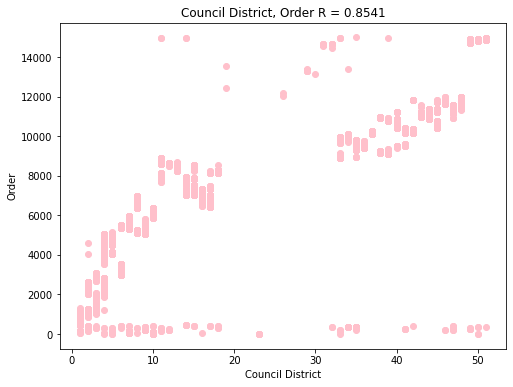

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Energy_and_Water.csv')

# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Find highly correlated features (absolute correlation above 0.8)
high_corr_pairs = correlation_matrix.abs().unstack().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs < 1.0]  # Exclude perfect self-correlation

# Example of a highly correlated pair
if not high_corr_pairs.empty:
    col_1, col_2 = high_corr_pairs.idxmax()
    
    # Extract and clean the data for the plot
    plot_data = data[[col_1, col_2]].dropna()
    
    # Plot the relationship
    plt.figure(figsize=(8, 6))
    plt.plot(plot_data[col_1], plot_data[col_2], 'o', color='pink')
    plt.xlabel(col_1)
    plt.ylabel(col_2)
    plt.title(f'{col_1}, {col_2} R = {np.corrcoef(plot_data[col_1], plot_data[col_2])[0][1]:.4f}')
    plt.show()
else:
    print("No highly correlated feature pairs found.")


While variables in a dataset are usually correlated to a small degree, highly collinear variables can be redundant in the sense that we only need to retain one of the features to give our model the necessary information.

Removing collinear features is a method to reduce model complexity by decreasing the number of features and can help to increase model generalization.  It can also help us to interpret the model because we only have to worry about a single variable, such as EUI, rather than how both EUI and weather normalized EUI affect the score. 

There are a number of methods for removing collinear features, such as using the [Variance Inflation Factor](http://www.statisticshowto.com/variance-inflation-factor/). We will use a simpler metric, and remove features that have a correlation coefficient above a certain threshold with each other (not with the score because we want variables that are highly correlated with the score!) For a more thorough discussion of removing collinear variables, check out [this notebook on Kaggle](https://www.kaggle.com/robertoruiz/dealing-with-multicollinearity/code).

The following code removes the collinear features based on a threshold we select for the correlation coefficients by removing one of the two features that are compared. It also prints the correlations that it removes so we can see the effect of adjusting the threshold. We will use a threshold of 0.6 which removes one of a pair of features if the correlation coefficient between the features exceeds this value. 


In [21]:
def remove_collinear_features(x, threshold=0.6):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        x: pandas DataFrame with features and the target variable
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        DataFrame that contains only the non-highly-collinear features
    '''
    
    # Don't want to remove correlations between Energy Star Score (or target)
    y = x['score']
    x = x.drop(columns=['score'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns))
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # Check if correlation exceeds threshold
                colname = corr_matrix.columns[i]  # Get the column name to drop
                print(f"Removing {colname} because it's highly correlated with {corr_matrix.columns[j]} "
                      f"(correlation = {corr_matrix.iloc[i, j]:.2f})")
                drop_cols.append(colname)

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)
    
    # Drop additional columns if specified
    x = x.drop(columns=[
        'Weather Normalized Site EUI (kBtu/ft²)', 
        'Water Use (All Water Sources) (kgal)',
        'log_Water Use (All Water Sources) (kgal)',
        'Largest Property Use Type - Gross Floor Area (ft²)'
    ], errors='ignore')  # Ignore errors if columns don't exist
    
    # Add the score back into the data
    x['score'] = y
               
    return x

# Example usage
# Assuming `features` is your initial DataFrame
features = remove_collinear_features(features, threshold=0.6)

# Remove any columns with all NaN values
features = features.dropna(axis=1, how='all')

# Display the resulting shape
print(f"Final dataset shape: {features.shape}")


Final dataset shape: (11746, 34)


Our final dataset now has 64 features (one of the columns is the target). This is still quite a few, but mostly it is because we have one-hot encoded the categorical variables. Moreover, while a large number of features may be problematic for models such as linear regression, models such as the random forest perform implicit feature selection and automatically determine which features are important during traning. There are other feature selection steps to take, but for now we will keep all the features we have and see how the model performs.

#### Additional Feature Selection

There are plenty of more methods for [feature selection](http://scikit-learn.org/stable/modules/feature_selection.html). Some popular methods include [principal components analysis (PCA)](http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf) which transforms the features into a reduced number of dimensions that preserve the greatest variance, or [independent components analysis (ICA)](http://cs229.stanford.edu/notes/cs229-notes11.pdf) which aims to find the independent sources in a set of features. However, while these methods are effective at reducing the number of features, they create new features that have no physical meaning and hence make interpreting a model nearly impossible. 

These methods are very helpful for dealing with high-dimensional data and I would suggest [reading more on the topic](https://machinelearningmastery.com/feature-selection-machine-learning-python/) if you plan on dealing with machine learning problems! 

## Split Into Training and Testing Sets

In machine learning, we always need to separate our features into two sets:

1. __Training set__ which we provide to our model during training along with the answers so it can learn a mapping between the features and the target. 
2. __Testing set__ which we use to evaluate the mapping learned by the model. The model has never seen the answers on the testing set, but instead, must make predictions using only the features. As we know the true answers for the test set, we can then compare the test predictions to the true test targets to ghet an estimate of how well our model will perform when deployed in the real world. 

For our problem, we will first extract all the buildings without an Energy Star Score (we don't know the true answer for these buildings so they will not be helpful for training or testing). Then, we will split the buildings with an Energy Star Score into a testing set of 30% of the buildings, and a training set of 70% of the buildings. 

Splitting the data into a random training and testing set is simple using scikit-learn. We can set the random state of the split to ensure consistent results.

In [22]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Assuming `features` contains the dataset
# Extract the buildings with no score and the buildings with a score
no_score = features[features['score'].isna()]
score = features[features['score'].notnull()]

# Print shapes of the two subsets
print(f"Buildings with no score: {no_score.shape}")
print(f"Buildings with a score: {score.shape}")

# Separate out the features and targets
features = score.drop(columns='score')
targets = pd.DataFrame(score['score'])

# Replace inf and -inf with NaN (to handle later if needed)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into 70% training and 30% testing set
X, X_test, y, y_test = train_test_split(features, targets, test_size=0.3, random_state=42)

# Print the shapes of the resulting datasets
print(f"Training features: {X.shape}")
print(f"Testing features: {X_test.shape}")
print(f"Training targets: {y.shape}")
print(f"Testing targets: {y_test.shape}")


Buildings with no score: (2104, 34)
Buildings with a score: (9642, 34)
Training features: (6749, 33)
Testing features: (2893, 33)
Training targets: (6749, 1)
Testing targets: (2893, 1)


We have 2104 buildings with no score, 6749 buildings with a score in the training set, and 2893 buildings with a score in the testing set. We have one final step to take in this notebook: determining a naive baseline for our models to beat!



# Establish a Baseline 

It's important to establish a naive baseline before we beginning making machine learning models. If the models we build cannot outperform a naive guess then we might have to admit that machine learning is not suited for this problem. This could be because we are not using the right models, because we need more data, or because there is a simpler solution that does not require machine learning. Establishing a baseline is crucial so we do not end up building a machine learning model only to realize we can't actually solve the problem.

For a regression task, a good naive baseline is to predict the median value of the target on the training set for all examples on the test set. This is simple to implement and sets a relatively low bar for our models: if they cannot do better than guessing the medin value, then we will need to rethink our approach. 

## Metric: Mean Absolute Error



In [25]:
import numpy as np

# Function to calculate Mean Absolute Error
def mae(y_true, y_pred):
    """
    Calculate the Mean Absolute Error (MAE) between true and predicted values.
    
    Parameters:
    - y_true: Array-like or DataFrame of true values
    - y_pred: Scalar or array-like of predicted values
    
    Returns:
    - Mean Absolute Error (float)
    """
    return np.mean(np.abs(np.array(y_true).flatten() - np.array(y_pred).flatten()))


# Calculate the baseline guess as the median value of the target in the training set
baseline_guess = np.median(y)

# Print the baseline guess
print('The baseline guess is a score of %0.2f' % baseline_guess)

# Calculate MAE for the baseline on the test set
baseline_mae = mae(y_test, baseline_guess)

# Print baseline performance
print("Baseline Performance on the test set: MAE = %0.4f" % baseline_mae)



The baseline guess is a score of 65.00
Baseline Performance on the test set: MAE = 25.3519


Now we can make the median guess and evaluate it on the test set.

This shows our average estimate on the test set is off by about 25 points. The scores are between 1 and 100 so this means the average error from a naive method if about 25%. The naive method of guessing the median training value provides us a low baseline for our models to beat! 

# Conclusions

In this notebook, we carried out the first three [steps of a machine learning](https://towardsdatascience.com/the-7-steps-of-machine-learning-2877d7e5548e?gi=30cd995093a9) problem:

1. Cleaned and formatted the raw data 
2. Performed an exploratory data analysis
3. Developed a set of features to train our model using feature engineering and feature selection

We also completed the crucial task of establishing a baseline metric so we can determine if our model is better than guessing! 



In [26]:
# Save the no scores, training, and testing data
no_score.to_csv('no_score.csv', index=False)
X.to_csv('training_features.csv', index=False)
X_test.to_csv('testing_features.csv', index=False)
y.to_csv('training_labels.csv', index=False)
y_test.to_csv('testing_labels.csv', index=False)

print("Data saved successfully:")
print("- No score data: no_score.csv")
print("- Training features: training_features.csv")
print("- Testing features: testing_features.csv")
print("- Training labels: training_labels.csv")
print("- Testing labels: testing_labels.csv")


Data saved successfully:
- No score data: no_score.csv
- Training features: training_features.csv
- Testing features: testing_features.csv
- Training labels: training_labels.csv
- Testing labels: testing_labels.csv
